импорт всех нужных библиотек

In [1]:
from sklearn.model_selection import train_test_split
import sys
import os
from model import create_model
import tensorflow as tf
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

#device = '/gpu:0' if tf.config.list_physical_devices('GPU') else '/cpu:0'
#print(device)

/cpu:0


Загрузка и подготовка данных для анализа и обучения модели.<br>
разбиение на train,test


In [2]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
pd_params = (10,9,50,1)
window_size,num_features,downsample_step,target_window_size = pd_params 

# Подготовка данных
X, y, df = PD.many_to_many(
    window_size,
    num_features,
    downsample_step,
    target_window_size
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [3]:
#инициализация модели
model = create_model(X_train, y_train,device=device)

c:\Users\nikit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [4]:
model.compile(optimizer='adam', loss='Huber',metrics = ['MAPE'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32,shuffle = True)


Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 103s 129ms/step - MAPE: 94.0939 - loss: 244.4576
Epoch 2/100
  7/451 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - MAPE: 83.9051 - loss: 211.4916

KeyboardInterrupt: 

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,shuffle = True,initial_epoch = 11)

In [5]:
LV = LossVisualizer(history)

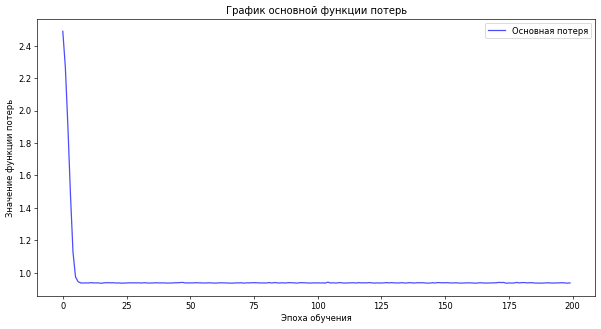

In [6]:
LV.show_training_loss()

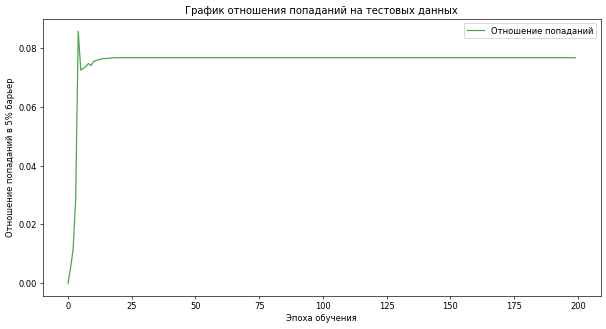

In [7]:
LV.show_test_tube()

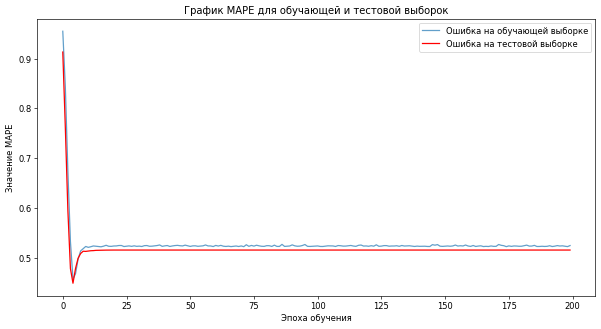

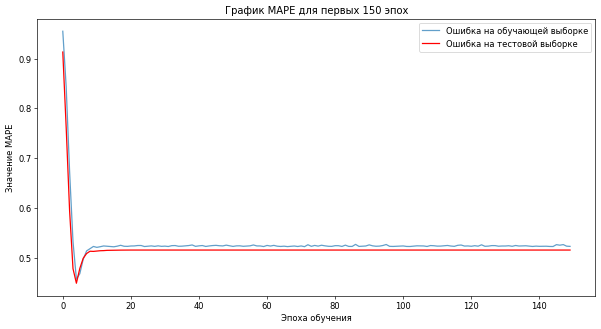

In [8]:
LV.show_mape()

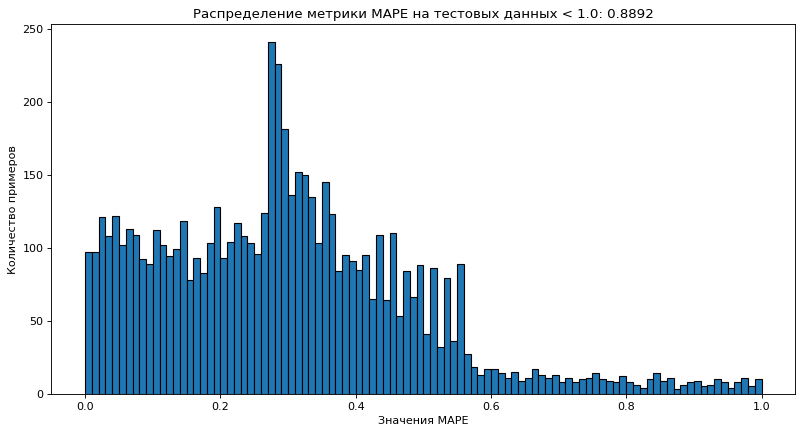

Процент значений MAPE < 1.0: 0.8892


In [11]:
LV.histogram_mape(model,X_test,y_test,limit_percel = 100)

Количество записей: 5334


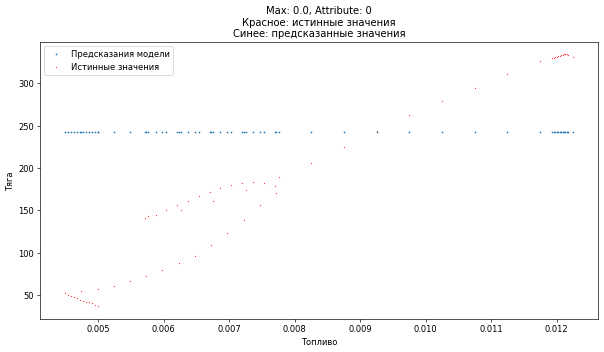

Количество записей: 5334


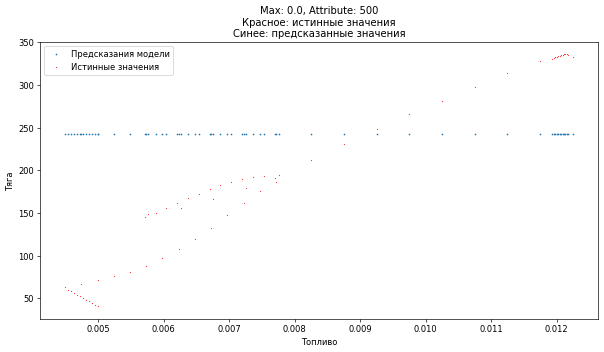

Количество записей: 5334


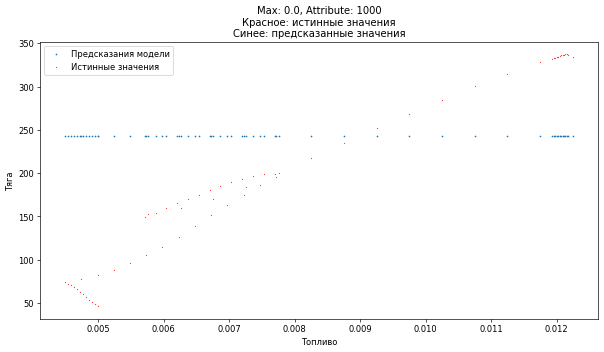

Количество записей: 5334


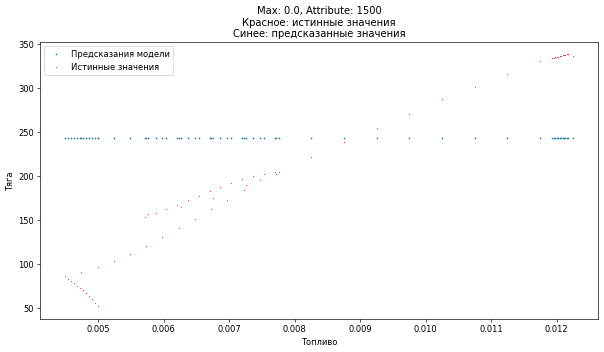

Количество записей: 5334


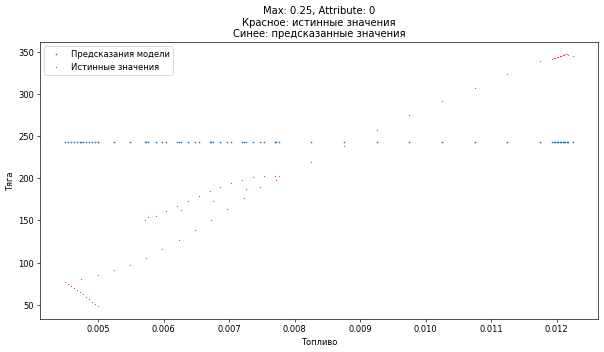

Количество записей: 5334


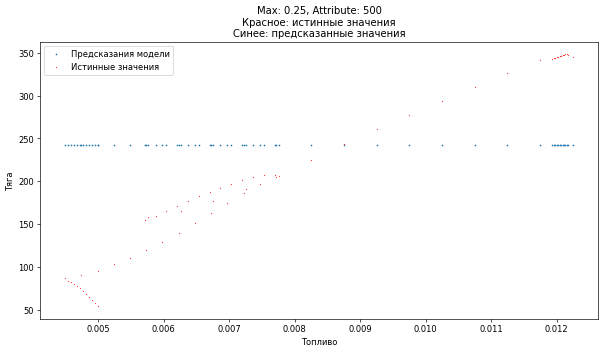

Количество записей: 5334


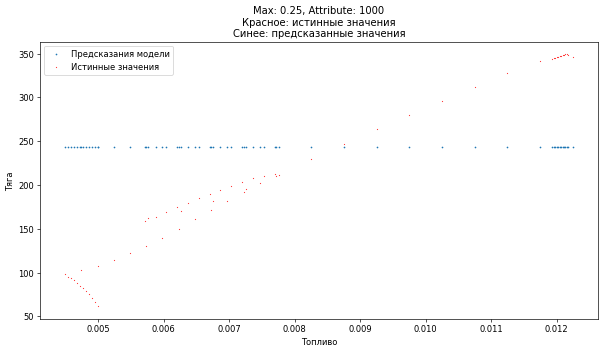

Количество записей: 5334


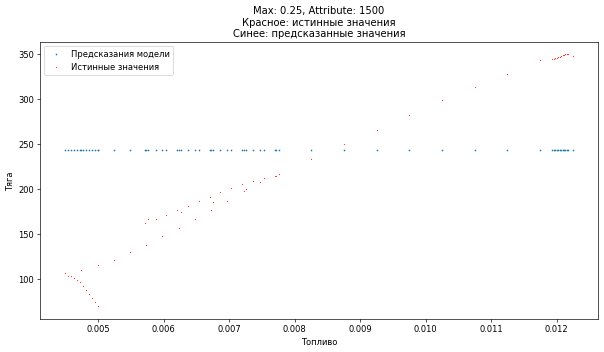

Количество записей: 5334


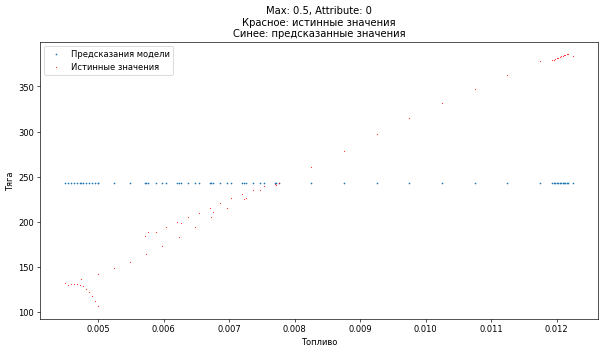

Количество записей: 5334


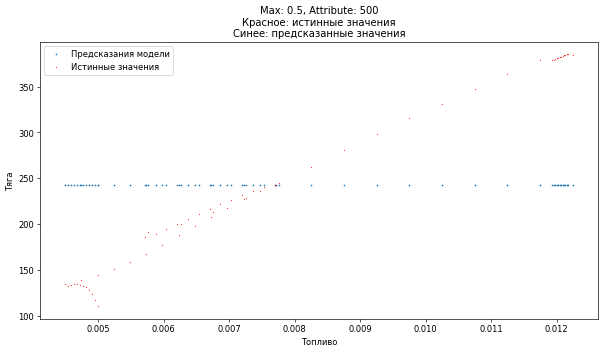

Количество записей: 5334


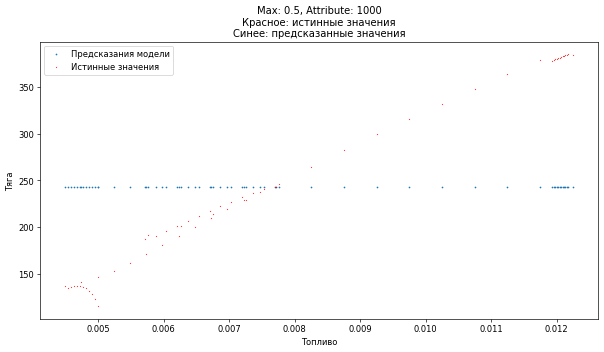

Количество записей: 5334


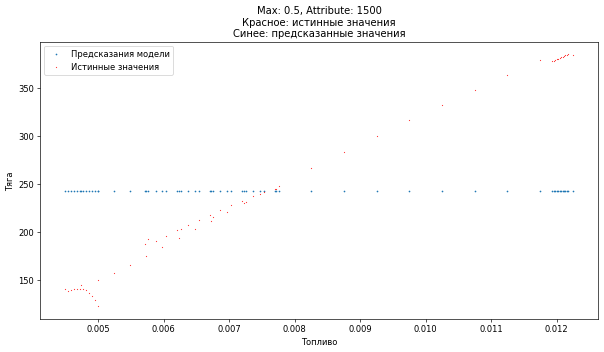

Количество записей: 5334


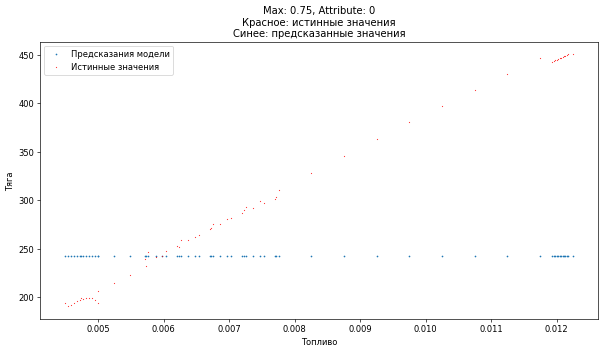

Количество записей: 5334


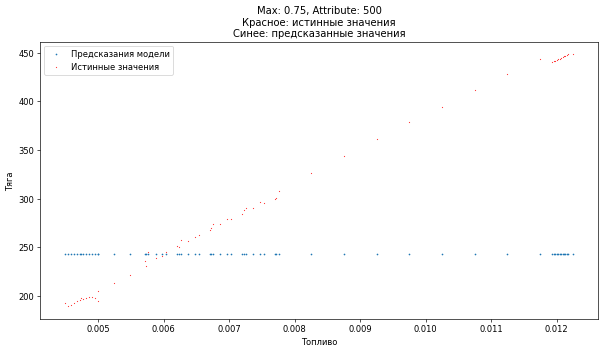

Количество записей: 5334


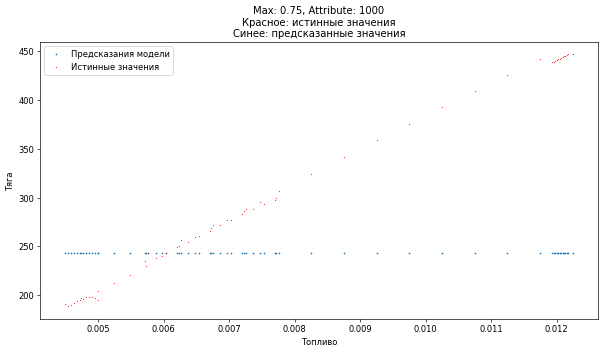

Количество записей: 5334


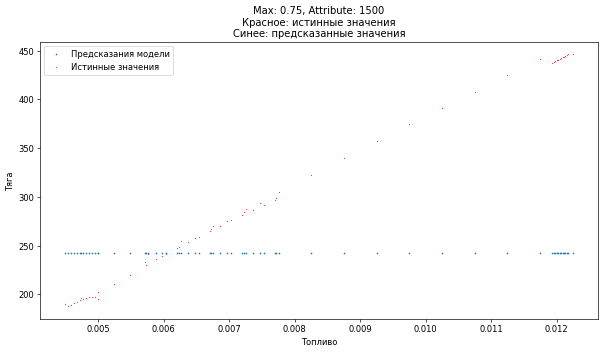

Количество записей: 5334


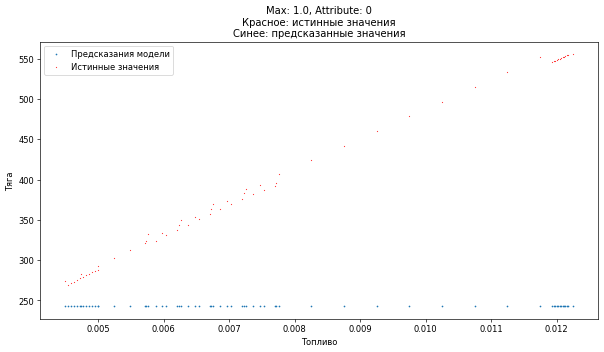

Количество записей: 5334


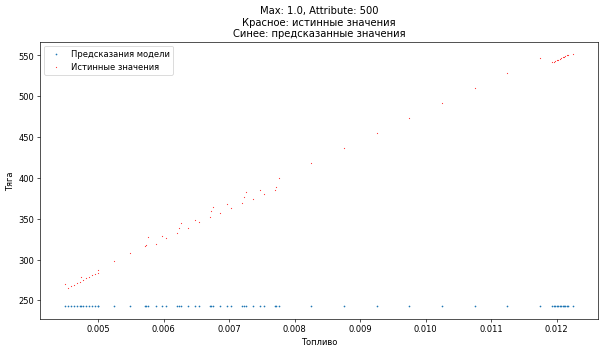

Количество записей: 5334


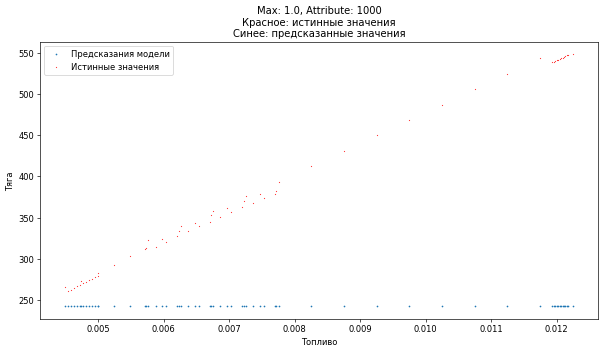

Количество записей: 5334


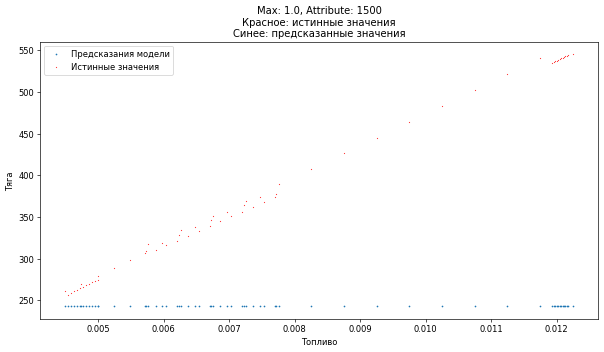

In [10]:
LV.show_predictions_rnn(model,df,pd_params,device)